# Analysis on Customers Segmentation

The aim of the analysis is to 
1. Determine the categories of our customers 
2. The group we should focus on 
3. The less performing group in terms of spending and income.

Analysis to carried out:
1. Exploratory Data Analysis (EDA)
2. Univariate, Bivariate and Multivariate Clustering
3. Visualization 
4. Exporting the visualisation and data

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.cluster import KMeans

# Loading The Customer Data

In [2]:
df_customer = pd.read_csv('Mall_Customers.csv')

In [3]:
# view Customers Data
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [4]:
# To check for missing data
df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# To determine the number of data that we have
df_customer.shape

(200, 5)

In [6]:
## Summary statistics of the Data
df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Since the CustomerID is not of Importance, we want to drop it

In [7]:
df_customer=df_customer.drop('CustomerID', axis = 1)

We can check our data to view the dropped column

In [8]:
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


To create chart showing the frequency of Gender

Text(0.5, 1.0, 'Gender Frequency')

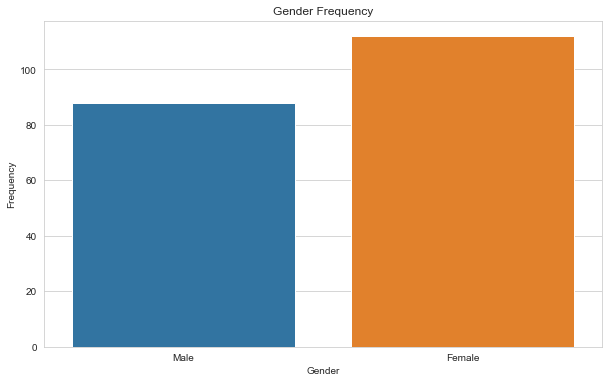

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data = df_customer, x= 'Gender')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Gender Frequency')

Next, we want to show the distribution of the quantitative variables.
we do this using the histogram

# Univariate Analysis

Warning appears in our code showing "C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)" we remove and prevent future occurrence with the code below

In [10]:
import warnings
warnings.filterwarnings('ignore')

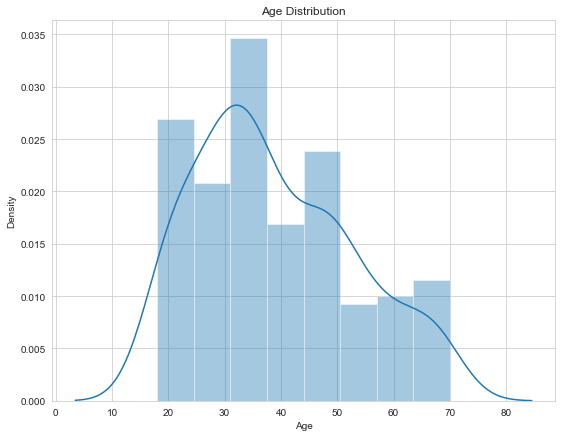

In [11]:
plt.figure(figsize = (9,7))
sns.distplot(df_customer['Age'])
plt.xlabel('Age')
plt.title('Age Distribution', fontsize= 12)
plt.show()

We would like to get the above visualization for all the remaning variables at one code.

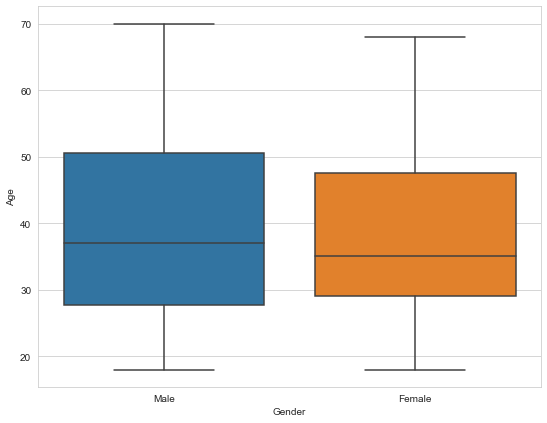

In [12]:
plt.figure(figsize= (9,7))
sns.boxplot(df_customer["Gender"],df_customer["Age"])
plt.show()

In [13]:
df_customer.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

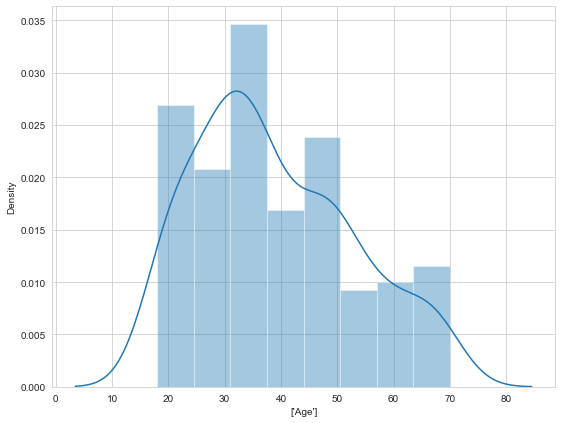

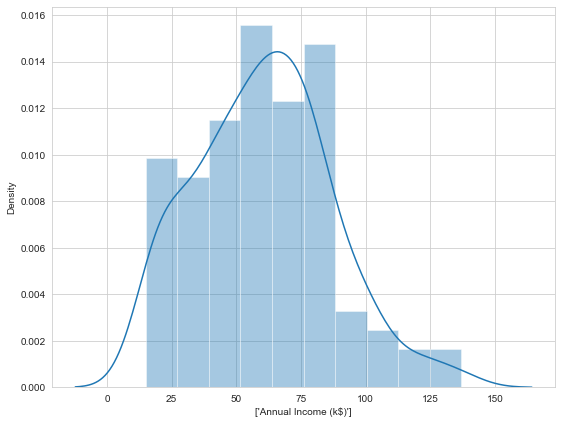

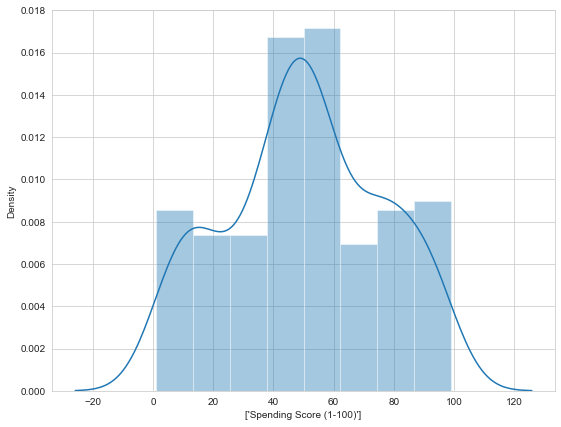

In [42]:
column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure(figsize = (9,7))
    sns.distplot(df_customer[i])
    plt.xlabel([i])
    plt.show()

# Bivariate Analysis

To determine the ditribution of the variables among the categorical variable

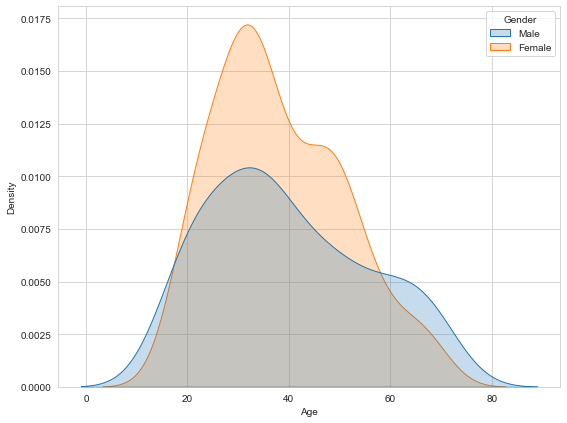

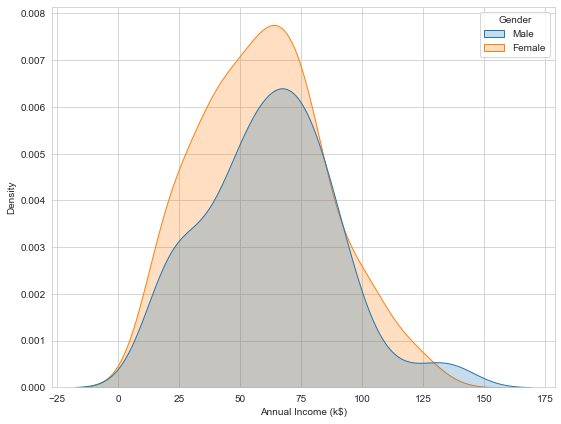

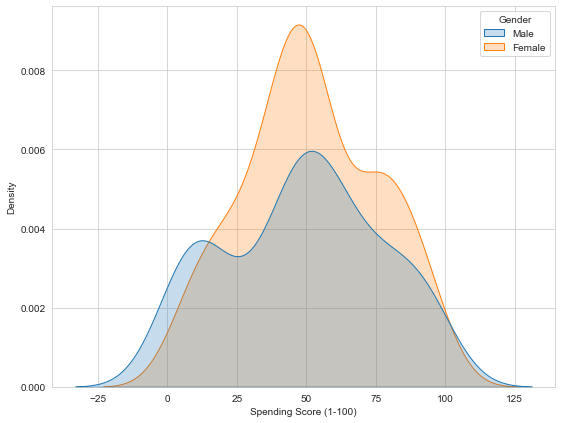

In [15]:
column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure(figsize = (9,7))
    sns.kdeplot(df_customer[i], shade= True, hue= df_customer['Gender'])
    plt.xlabel(i)
    plt.show(block =True)

We can Visualise all the chart at with a code instead of writing multiple codes

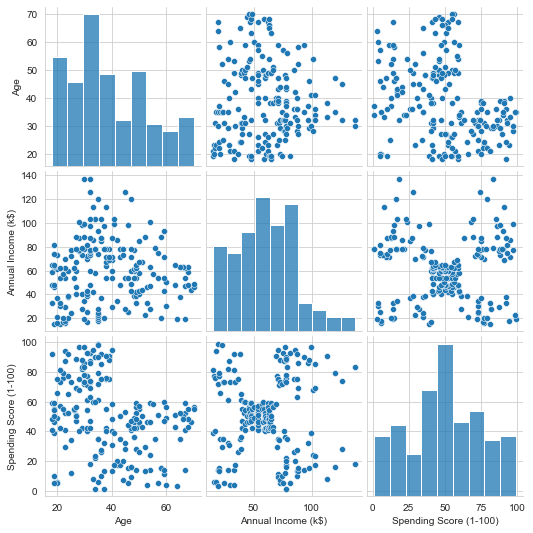

In [16]:
sns.pairplot(df_customer)

# We would like to see if there is any relationship among our data

In [17]:
df_customer.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


we see that there are some relationships among our data and we would like to visualize it

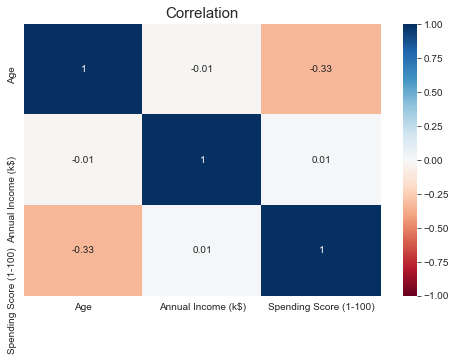

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df_customer.corr().round(2),
           annot = True,
           vmax = 1,
           vmin = -1,
           cmap = 'RdBu')
plt.title('Correlation', fontsize = 15)
plt.show()

# Clustering Analysis

# Univariate Cluster

In [19]:
cluster =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_customer[['Annual Income (k$)']])
    cluster.append(kmeans.inertia_)

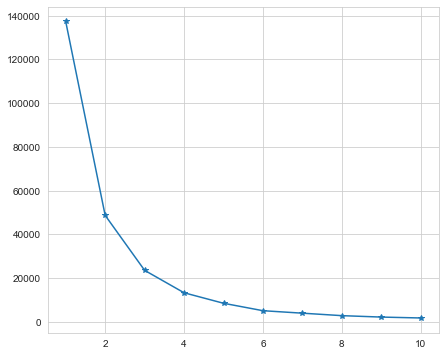

In [20]:
plt.figure(figsize=(7,6))
plt.plot(range(1,11), cluster, marker = '*', linestyle = '-')
plt.show()

In [21]:
cluster = KMeans(n_clusters =3)

In [22]:
cluster.fit(df_customer[['Annual Income (k$)']])
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
df_customer['Income cluster'] = cluster.labels_

In [24]:
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [25]:
df_customer.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [26]:
Income_cluster_des = df_customer.groupby(df_customer['Income cluster'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().round(2)

In [27]:
Income_cluster_des

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,39.18,66.72,50.05
1,38.93,33.03,50.17
2,37.83,99.89,50.64


we Would like the label our clustered group

In [28]:
Income_cluster_des.rename({0: "Wise Spending",
                           1: "Low Spending",
                           2: "Target Group"})

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
Wise Spending,39.18,66.72,50.05
Low Spending,38.93,33.03,50.17
Target Group,37.83,99.89,50.64


# Bivariate Clustering Analysis 

In [29]:
cluster2 = []
for i in range (1,11):
    kmeans2=KMeans(n_clusters = i)
    kmeans2.fit(df_customer[['Annual Income (k$)','Spending Score (1-100)']])
    cluster2.append(kmeans2.inertia_)

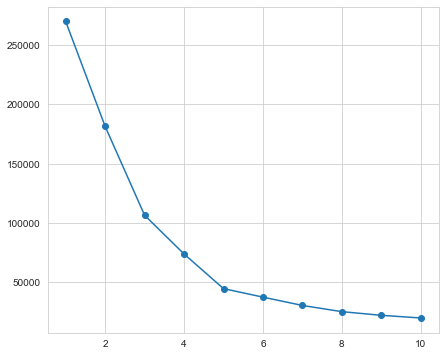

In [30]:
plt.figure(figsize=(7,6))
plt.plot(range(1,11), cluster2, marker = 'o', linestyle = '-')
plt.show()

In [31]:
cluster2 = KMeans(n_clusters = 5)

In [32]:
cluster2.fit(df_customer[['Annual Income (k$)','Spending Score (1-100)']])
cluster2.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [33]:
df_customer['Income Spending Cluster'] = cluster2.labels_

In [34]:
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income Spending Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


In [35]:
Income_cluster2_des = df_customer.groupby(df_customer['Income Spending Cluster'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().round(2)
#Income_cluster2_des.rename({0: "Wise Spending",
                           #1: "Impulse Buyer",
                           #2: "Moderate Spender",
                           #3: "Money Saver",
                           #4: "Flyer spender"})
Income_cluster2_des

,Age,Annual Income (k$),Spending Score (1-100)
Income Spending Cluster,,,
0,45.22,26.30,20.91
1,32.69,86.54,82.13
2,41.11,88.20,17.11
3,42.72,55.30,49.52
4,25.27,25.73,79.36


In [36]:
df_customer['Label']= df_customer['Income Spending Cluster'].map({0: "Wise Spending",
                           1: "Occasional Buyer",
                           2: "Low Spender",
                           3: "Impulse buyer",
                           4: "Well off"})

In [37]:
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income Spending Cluster,Label
0,Male,19,15,39,1,0,Wise Spending
1,Male,21,15,81,1,4,Well off
2,Female,20,16,6,1,0,Wise Spending
3,Female,23,16,77,1,4,Well off
4,Female,31,17,40,1,0,Wise Spending


Visualisation among the Income Spending Cluster

In [38]:
centers= pd.DataFrame(cluster2.cluster_centers_)
centers.columns =['X', 'Y']
centers

,X,Y
0,26.304348,20.913043
1,86.538462,82.128205
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


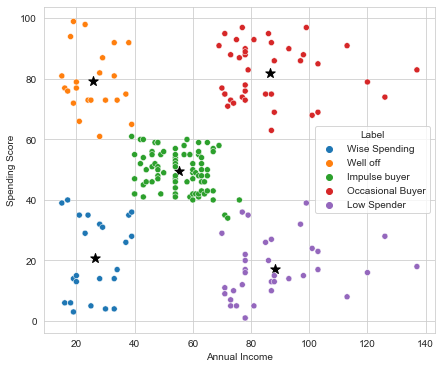

In [39]:
plt.figure(figsize=(7,6))
plt.scatter(x=centers['X'], y=centers['Y'], s=100, c='black', marker='*')
sns.scatterplot(data = df_customer, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue = 'Label',palette = 'tab10')
plt.ylabel('Spending Score')
plt.xlabel('Annual Income')
plt.show()

In [40]:
pd.crosstab(df_customer['Label'], df_customer['Gender'], normalize ='index')

Gender,Female,Male
Label,,
Impulse buyer,0.592593,0.407407
Low Spender,0.457143,0.542857
Occasional Buyer,0.538462,0.461538
Well off,0.590909,0.409091
Wise Spending,0.608696,0.391304


In [41]:
df_customer.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Income Spending Cluster', 'Label'],
      dtype='object')